<a href="https://colab.research.google.com/github/bastiansosa/procesamiento-digital/blob/main/procesamientodigital9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import skimage.io as io

dimension de foto(i,j)

dimesion filtro(k,l)

para saber la dimension final-> (i-k+1 , j-l+1)

restrinciones

erosion = condicion = 5

dilatacion = condicion > 0

In [ ]:
imx = io.imread('https://raw.githubusercontent.com/jorgevergara/PDI/main/lineas2.png?raw=true', as_gray=True)

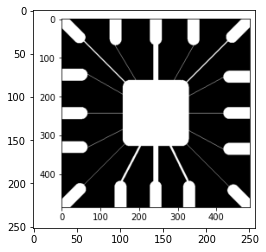

In [ ]:
plt.imshow(imx, cmap="gray")


In [ ]:
#normalizacion

Ex = np.ones((45,45))  #patron
Ex[0:22 , 0:22]=0
Ex[0:22,23:45]=0
Ex[23:45,0:22]=0
Ex[23:45,23:45]=0
Ex

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def dilatacion(im,E): # lo que busca la dilatacion, es si en la imagen hay algun 1 respecto al patron 
  nfr = im.shape[0] - E.shape[0]+1
  ncr = im.shape[1] - E.shape[1]+1
  R = np.zeros((nfr,ncr))

  for i in range(nfr):
    for j in range(ncr):
      temp = im[i:i+E.shape[0] , j:j+E.shape[0]]
      temp2 = temp * E
      if np.sum(temp2) == np.sum(E):
        R[i,j] = 1
  return R


In [ ]:
def erosion(imx,Ex): #proceso donde buscan que si todos son 1 en una columna con respecto al patron 
  nfr = imx.shape[0] - Ex.shape[0]+1
  ncr = imx.shape[1] - Ex.shape[1]+1
  R = np.zeros((nfr,ncr))

  for i in range(nfr):
    for j in range(ncr):
      temp = imx[i:i+Ex.shape[0] , j:j+Ex.shape[0]]
      temp2 = temp * Ex
      if np.sum(temp2) > 0:
        R[i,j] = 1
  return R

def closing(im,E):
  return erosion(dilatacion(im,E),E)

def opening(im,E):
  return dilatacion(erosion(im,E),E)

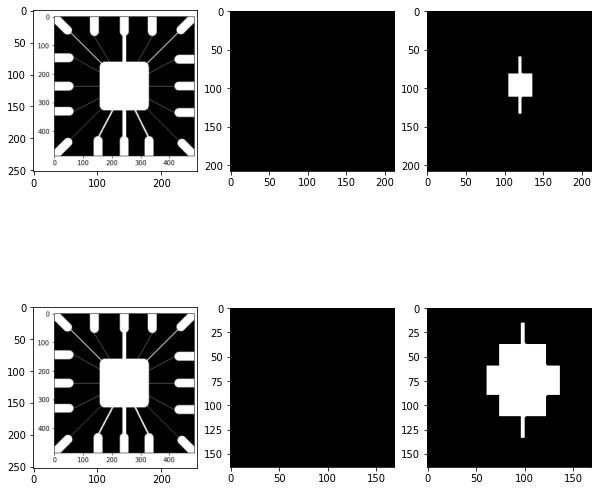

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(10,10))
ax[0,0].imshow(imx, cmap="gray")
ax[0,1].imshow(erosion(imx,Ex), cmap="gray")
ax[0,2].imshow(dilatacion(imx,Ex), cmap="gray")
ax[1,0].imshow(imx, cmap="gray")
ax[1,1].imshow(opening(imx,Ex), cmap="gray")
ax[1,2].imshow(closing(imx,Ex), cmap="gray")
